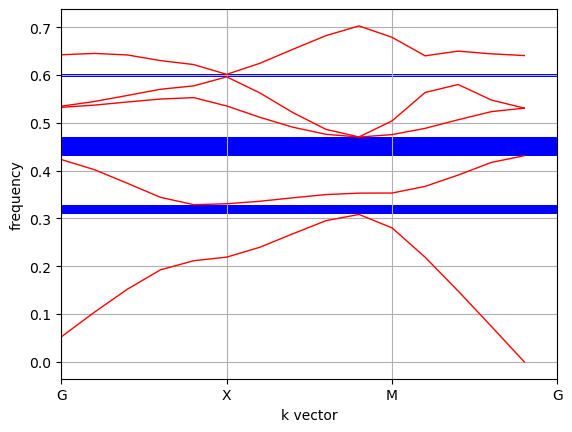

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#unit cell
a=1e-6
#a=4
r=0.4*a

numG=4 #number of plane waves in ft
#permitivity
eps1=1 #inside circular hole
eps2=9 #outside circular hole

#mesh
mesh_div=30
X=np.linspace(-a/2, a/2, mesh_div+1) #coordinates
Y=np.linspace(-a/2, a/2, mesh_div+1)

in_eps=np.array([[1/eps1 if (np.sqrt(X[x]**2+Y[y]**2))<r else 1/eps2 for x in range(len(X)-1)] for y in range(len(Y)-1)])

xMesh, yMesh = np.meshgrid(X[:-1], Y[:-1])
#we truncate the last part so that 
#1. it is a square matrix
#2. since we are taking it such that they are coords, they don't 
#make a big difference

#k-path
precis=5

kx=np.r_[
    np.linspace(0, np.pi/a, precis+1),
    np.full(precis-1, np.pi/a),
    np.linspace(np.pi/a, 0, precis+1),
]
ky=np.r_[
    np.zeros(precis),
    np.linspace(0, np.pi/a, precis+1),
    np.linspace(np.pi/a-np.pi/a/precis, 0, precis)    
]

     
G0=np.arange(-numG*2*np.pi/a, (numG+1)*2*np.pi/a, 2*np.pi/a)
G=np.array([[gx, gy] for gx in G0 for gy in G0])

A_mesh=(a/mesh_div)**2
A_total=a**2

C_ft=np.zeros((len(G), len(G)), dtype=complex)
for g in range(len(G)):
    for g1 in range(len(G)):
        C_ft[g][g1]=np.sum(np.sum(in_eps*np.exp(1j*((G[g][0]-G[g1][0])*xMesh+(G[g][1]-G[g1][1])*yMesh))))*A_mesh/A_total
#summing over all mesh units

M=np.zeros((len(kx), len(G), len(G)), dtype=complex)
for ki in range(len(kx)):
    kvec = np.array([kx[ki],ky[ki]])
    for g in range(len(G)):
        for g1 in range(len(G)):
            M[ki,g,g1] = C_ft[g,g1] * np.dot(kvec+G[g], kvec+G[g1])
            
dispersion=np.zeros((len(G), len(kx)))
for k in range(len(kx)):
    MM=np.zeros((len(G), len(G)))
    MM=M[k, :, :]
    eig_val, eig_vec=np.linalg.eig(MM)
    eig_val=np.abs(np.sort(np.real(eig_val))) 
    dispersion[:, k]=np.sqrt(eig_val)*a/2/np.pi  #normalized
    
n=5 #number of bands
plt.figure()
ax=plt.gca()
for i in range(n):
    plt.plot(np.abs(dispersion[i, :]), 'r', linewidth=1)
    if min(dispersion[i+1, :])>max(dispersion[i, :]):
        rect_height = min(dispersion[i + 1, :]) - max(dispersion[i, :])
        rect = Rectangle((1, max(dispersion[i, :])), len(kx) - 1, rect_height, facecolor='blue')
        ax.add_patch(rect)
        
plt.xticks([1, precis + 1, 2 * precis + 1, 3 * precis + 1], ['G', 'X', 'M', 'G'])
plt.grid(True)
plt.xlabel('k vector')
plt.ylabel('frequency')
plt.xlim((1,len(kx)))
plt.show()


